In [1]:
# Import relevant libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading

In [2]:
df = pd.read_csv('loan_borower_data.csv')

In [3]:
print(df.shape)
df.head()

(9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Exploration

In [4]:
df.describe(include='all')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [5]:
# check for missing values
df.isna().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

So, we don't have any missing data

In [6]:
# let's see the datatypes of our data
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

We, see all of our data is in proper format

But, one of the feature, i.e., 'purpose' is categorical data, which needs to be made numerical.

# Data Visualisation

### Visualising numerical features

In [7]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


                log.annual.inc  not.fully.paid
log.annual.inc        1.000000       -0.033439
not.fully.paid       -0.033439        1.000000



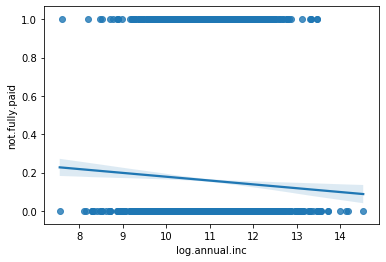

In [8]:
# let's see the correlation of all features with target, and plot the regression plot, one-by-one
print(df[['log.annual.inc','not.fully.paid']].corr())
print()
sns.regplot(x='log.annual.inc', y='not.fully.paid', data=df)

We see that none of the feature has strong correlation with the target data.
So, we shouldn't expect a model trained on this data to give very good results.

### Visualising categorical feature

In [9]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

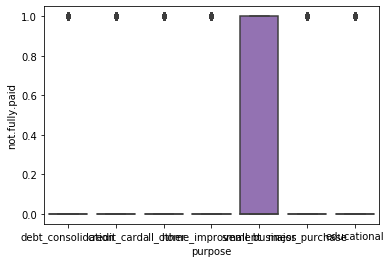

In [10]:
sns.boxplot(x='purpose', y='not.fully.paid', data=df)

# Pre-processing and feature Engineering

In [11]:
# Converting categorical features to numerical features
df = pd.get_dummies(df)
print(df.shape)
df.head()

(9578, 20)


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [12]:
# Data normalisation: let's get all the numerical data in same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)   # scaled data
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)   # converting nd-array(returned by fit-transform) to dataframe
scaled_data['not.fully.paid'] = scaled_data['not.fully.paid'].astype('int')   
scaled_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x = scaled_data.drop('not.fully.paid', axis=1)
y = scaled_data['not.fully.paid']

print(x.shape, y.shape)

(9578, 19) (9578,)


So, we see that we have a lot of features, many of which may not be relevant.
Let's apply PCA and select only relevant data

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

pca.fit(x)
transformed_x = pca.transform(x)

In [15]:
print(transformed_x.shape)
print(type(transformed_x))

(9578, 11)
<class 'numpy.ndarray'>


So, we see that now the dimensions have reduced to 11 from previous 20

In [16]:
y = y.to_numpy()    # as transformed_x is an nd-array
print(y.shape)

(9578,)


# Model development

In [17]:
# Splitting data into training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

In [18]:
x_train.shape[0]/x_test.shape[0]

3.998956158663883

In [19]:
# Importing and fitting Random Forest classifer
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)

clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,clf.predict(x_test))

0.8225469728601252